### This book implements the hddm tutorial on dummy data
http://ski.clps.brown.edu/hddm_docs/tutorial_python.html

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import hddm

/usr/lib/python3/dist-packages/IPython/parallel.py:12: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  warn("The `IPython.parallel` package has been deprecated since IPython 4.0. "


In [4]:
data = hddm.load_csv('dummydata')

In [5]:
data.head()

,Unnamed: 0,experiment,subject1,subject1_threshold,subject2,subject2_threshold,trial_number,s1_condition,signalpresence,selection,rt,repeatc,correct,obsc
0,0,0,2,52.113312,0,43.751788,0,obs,no,no,-121.987091,0,True,NaN
1,1,0,2,52.113312,0,43.751788,1,obs,no,yes,801.638673,1,False,NaN
2,2,0,2,52.113312,0,43.751788,2,act,no,no,1164.054775,0,True,2.0
3,3,0,2,52.113312,0,43.751788,3,act,yes,yes,73.921898,1,True,NaN
4,4,0,2,52.113312,0,43.751788,4,act,yes,yes,478.708290,2,True,NaN


In [24]:
# Instantiate model object passing it our data (no need to call flip_errors() before passing it).
# This will tailor an individual hierarchical DDM around your dataset.
m = hddm.HDDM(data, depends_on={'v': 'repeatc'})
# find a good starting point which helps with the convergence.
m.find_starting_values()
# start drawing 7000 samples and discarding 5000 as burn-in
m.sample(2000, burn=20)

-1384.358743486435
-1384.358491106128
 [-----------------100%-----------------] 2001 of 2000 complete in 604.7 sec

In [25]:
stats = m.gen_stats()

stats

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.5898,0.805166,0.703992,1.08067,1.35178,1.80894,3.85212,0.0547668
v(0),5.21669,1.93703,2.05349,3.78063,4.96822,6.47494,9.43087,0.0701239
v(1),4.68971,2.05885,1.11062,3.25122,4.58675,6.0082,9.096,0.0852233
v(2),4.20536,1.99033,1.10271,2.66235,3.95307,5.5153,8.50541,0.0583023
v(3),4.96078,2.62123,0.518125,2.96573,4.75956,6.74231,10.4828,0.102058
v(4),3.24417,2.36672,-0.678611,1.50706,3.02607,4.75605,8.37398,0.062123
t,0.163086,0.197982,0.0254442,0.0546745,0.071775,0.198564,0.726922,0.0140971


In [28]:
# m.plot_posteriors(['a', 't', 'v', 'a_std'])

In [29]:
# m.plot_posterior_predictive(figsize=(14, 10))

Text(0.5, 1.0, 'Posterior of drift-rate group means')

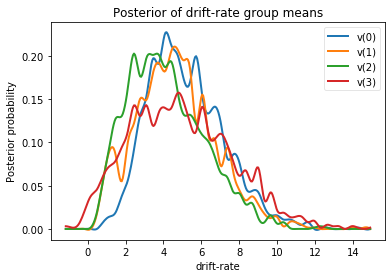

In [33]:
v1, v2, v3, v4 = m.nodes_db.node[['v(0)', 'v(1)', 'v(2)', 'v(3)']]
hddm.analyze.plot_posterior_nodes([v1, v2, v3, v4])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')